In [1]:
API = "api-fxpractice.oanda.com/"
STREAM_API = "stream-fxpractice.oanda.com/"

In [2]:
import requests
import json
import numpy as np
import pandas as pd
from json.decoder import JSONDecodeError
import datetime as date
import time

In [3]:
class create:
    
    def __init__(self, instrument, ltp):
        self.instrument = instrument
        self.ltp = ltp
        
        dictionary = {
            instrument : ltp
        }
        
        with open("ltp.json", 'r+') as file:
            try:  
                old_data = json.load(file)
                old_data.update(dictionary)
                json.dump(old_data,file)
            except JSONDecodeError:
                json.dump(dictionary, file)

In [4]:
def json_to_pandas(json):
    json_file = json.json()
    price_json = json_file["candles"]
    times = []
    
    close_price,high_price,low_price,open_price =[], [], [], []
    for candle in price_json:
        times.append(candle["time"])
        close_price.append(float(candle["mid"]["c"]))
        high_price.append(float(candle["mid"]["h"]))
        low_price.append(float(candle["mid"]["l"]))
        open_price.append(float(candle["mid"]["o"]))
    
    dataframe = pd.DataFrame({"close":close_price, "high": high_price, "low": low_price, "open":open_price})
    dataframe.index  =pd.to_datetime(times)
    return dataframe
        

In [5]:
pricingPath = "v3/accounts/ENTER ACCOUNT ID/pricing"


In [6]:
#Europe/US

query = {"instruments": "EUR_USD"}
headers = {"Authorization": "Bearer " +  "INSERT KEY"}

In [7]:
response = requests.get("https://"+API+pricingPath, headers=headers,params=query)


In [8]:
response.json()

{'time': '2021-06-17T11:42:43.243459681Z',
 'prices': [{'type': 'PRICE',
   'time': '2021-06-17T11:42:41.258925647Z',
   'bids': [{'price': '1.19334', 'liquidity': 10000000}],
   'asks': [{'price': '1.19348', 'liquidity': 10000000}],
   'closeoutBid': '1.19334',
   'closeoutAsk': '1.19348',
   'status': 'tradeable',
   'tradeable': True,
   'unitsAvailable': {'default': {'long': '4189674', 'short': '4189674'},
    'openOnly': {'long': '4189674', 'short': '4189674'},
    'reduceFirst': {'long': '4189674', 'short': '4189674'},
    'reduceOnly': {'long': '0', 'short': '0'}},
   'quoteHomeConversionFactors': {'positiveUnits': '1.00000000',
    'negativeUnits': '1.00000000'},
   'instrument': 'EUR_USD'}]}

In [9]:
json_response = response.json()
instrument = json_response["prices"][0]["instrument"]
prices = json_response["prices"][0]["asks"][0]["price"]
prices = float(prices)
ltp1=create(instrument,prices)


In [10]:
#Creating ORB

from_time = time.mktime(pd.to_datetime("4/23/2021").timetuple())
to_time = time.mktime(pd.to_datetime("4/24/2021").timetuple())

In [11]:
query = {"from":str(from_time), "to":str(to_time), "granularity":"M15"}

In [12]:
candlesPath = "v3/accounts/ENTER ACCOUNT ID/instruments/"

In [13]:
response = requests.get("https://"+API+candlesPath+instrument+"/candles", headers=headers,params=query)

In [14]:
response.json()

{'instrument': 'EUR_USD',
 'granularity': 'M15',
 'candles': [{'complete': True,
   'volume': 1023,
   'time': '2021-04-22T18:30:00.000000000Z',
   'mid': {'o': '1.20000', 'h': '1.20053', 'l': '1.19986', 'c': '1.20048'}},
  {'complete': True,
   'volume': 784,
   'time': '2021-04-22T18:45:00.000000000Z',
   'mid': {'o': '1.20046', 'h': '1.20080', 'l': '1.20020', 'c': '1.20078'}},
  {'complete': True,
   'volume': 790,
   'time': '2021-04-22T19:00:00.000000000Z',
   'mid': {'o': '1.20078', 'h': '1.20080', 'l': '1.20044', 'c': '1.20066'}},
  {'complete': True,
   'volume': 843,
   'time': '2021-04-22T19:15:00.000000000Z',
   'mid': {'o': '1.20065', 'h': '1.20108', 'l': '1.20034', 'c': '1.20106'}},
  {'complete': True,
   'volume': 645,
   'time': '2021-04-22T19:30:00.000000000Z',
   'mid': {'o': '1.20104', 'h': '1.20139', 'l': '1.20096', 'c': '1.20133'}},
  {'complete': True,
   'volume': 868,
   'time': '2021-04-22T19:45:00.000000000Z',
   'mid': {'o': '1.20134', 'h': '1.20176', 'l': '1

In [15]:
EURUSD_df = json_to_pandas(response)

In [16]:
EURUSD_df.head()

,close,high,low,open
2021-04-22 18:30:00+00:00,1.20048,1.20053,1.19986,1.20000
2021-04-22 18:45:00+00:00,1.20078,1.20080,1.20020,1.20046
2021-04-22 19:00:00+00:00,1.20066,1.20080,1.20044,1.20078
2021-04-22 19:15:00+00:00,1.20106,1.20108,1.20034,1.20065
2021-04-22 19:30:00+00:00,1.20133,1.20139,1.20096,1.20104


<AxesSubplot:>

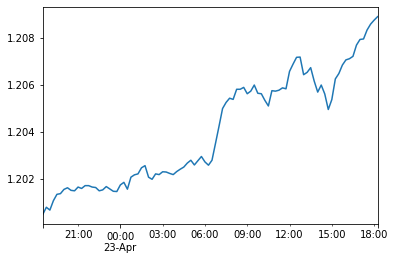

In [17]:
EURUSD_df["close"].plot()

In [18]:
#Australia/US

query = {"instruments": "AUD_USD"}
headers = {"Authorization": "Bearer " +  "INSERT KEY"}

In [19]:
response = requests.get("https://"+API+pricingPath, headers=headers,params=query)

In [20]:
response.json()

{'time': '2021-06-17T11:42:45.322538247Z',
 'prices': [{'type': 'PRICE',
   'time': '2021-06-17T11:42:44.602605110Z',
   'bids': [{'price': '0.75727', 'liquidity': 10000000}],
   'asks': [{'price': '0.75740', 'liquidity': 10000000}],
   'closeoutBid': '0.75727',
   'closeoutAsk': '0.75740',
   'status': 'tradeable',
   'tradeable': True,
   'unitsAvailable': {'default': {'long': '4401369', 'short': '4401369'},
    'openOnly': {'long': '4401369', 'short': '4401369'},
    'reduceFirst': {'long': '4401369', 'short': '4401369'},
    'reduceOnly': {'long': '0', 'short': '0'}},
   'quoteHomeConversionFactors': {'positiveUnits': '1.00000000',
    'negativeUnits': '1.00000000'},
   'instrument': 'AUD_USD'}]}

In [21]:
json_response_temp = response.json()
instrumentTemp = json_response_temp["prices"][0]["instrument"]
pricesTemp = json_response_temp["prices"][0]["asks"][0]["price"]
pricesTemp = float(pricesTemp)
ltpTemp=create(instrumentTemp,pricesTemp)

In [22]:
#US/Japan

query = {"instruments": "USD_JPY"}
headers = {"Authorization": "Bearer " +  "INSERT KEY"}

In [23]:
response = requests.get("https://"+API+pricingPath, headers=headers,params=query)

In [24]:
response.json()

{'time': '2021-06-17T11:42:46.002317623Z',
 'prices': [{'type': 'PRICE',
   'time': '2021-06-17T11:42:44.812322374Z',
   'bids': [{'price': '110.735', 'liquidity': 10000000}],
   'asks': [{'price': '110.748', 'liquidity': 10000000}],
   'closeoutBid': '110.735',
   'closeoutAsk': '110.748',
   'status': 'tradeable',
   'tradeable': True,
   'unitsAvailable': {'default': {'long': '2500000', 'short': '2500000'},
    'openOnly': {'long': '2500000', 'short': '2500000'},
    'reduceFirst': {'long': '2500000', 'short': '2500000'},
    'reduceOnly': {'long': '0', 'short': '0'}},
   'quoteHomeConversionFactors': {'positiveUnits': '0.00902951',
    'negativeUnits': '0.00903057'},
   'instrument': 'USD_JPY'}]}

In [25]:
json_response2 = response.json()
instrument2 = json_response2["prices"][0]["instrument"]
prices2 = json_response2["prices"][0]["asks"][0]["price"]
prices2 = float(prices2)
ltp2=create(instrument2,prices2)

In [26]:
#Creating ORB

from_time = time.mktime(pd.to_datetime("4/23/2021").timetuple())
to_time = time.mktime(pd.to_datetime("4/24/2021").timetuple())

In [27]:
query = {"from":str(from_time), "to":str(to_time), "granularity":"M15"}

In [28]:
response = requests.get("https://"+API+candlesPath+instrument2+"/candles", headers=headers,params=query)

In [29]:
response.json()

{'instrument': 'USD_JPY',
 'granularity': 'M15',
 'candles': [{'complete': True,
   'volume': 509,
   'time': '2021-04-22T18:30:00.000000000Z',
   'mid': {'o': '108.138', 'h': '108.144', 'l': '108.112', 'c': '108.128'}},
  {'complete': True,
   'volume': 485,
   'time': '2021-04-22T18:45:00.000000000Z',
   'mid': {'o': '108.128', 'h': '108.138', 'l': '108.086', 'c': '108.088'}},
  {'complete': True,
   'volume': 355,
   'time': '2021-04-22T19:00:00.000000000Z',
   'mid': {'o': '108.087', 'h': '108.108', 'l': '108.078', 'c': '108.082'}},
  {'complete': True,
   'volume': 434,
   'time': '2021-04-22T19:15:00.000000000Z',
   'mid': {'o': '108.084', 'h': '108.084', 'l': '108.028', 'c': '108.038'}},
  {'complete': True,
   'volume': 266,
   'time': '2021-04-22T19:30:00.000000000Z',
   'mid': {'o': '108.037', 'h': '108.052', 'l': '108.024', 'c': '108.041'}},
  {'complete': True,
   'volume': 518,
   'time': '2021-04-22T19:45:00.000000000Z',
   'mid': {'o': '108.042', 'h': '108.048', 'l': '10

In [30]:
JPYUSD_df = json_to_pandas(response)

In [31]:
JPYUSD_df.head()

,close,high,low,open
2021-04-22 18:30:00+00:00,108.128,108.144,108.112,108.138
2021-04-22 18:45:00+00:00,108.088,108.138,108.086,108.128
2021-04-22 19:00:00+00:00,108.082,108.108,108.078,108.087
2021-04-22 19:15:00+00:00,108.038,108.084,108.028,108.084
2021-04-22 19:30:00+00:00,108.041,108.052,108.024,108.037


<AxesSubplot:>

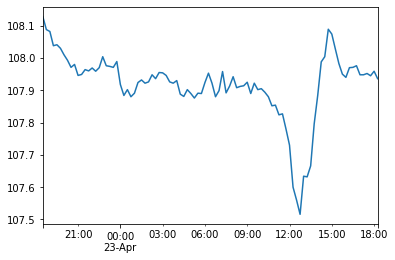

In [32]:
JPYUSD_df["close"].plot()

In [33]:
#Europe/Japan

query = {"instruments": "EUR_JPY"}
headers = {"Authorization": "Bearer " +  "INSERT KEY"}

In [34]:
response = requests.get("https://"+API+pricingPath, headers=headers,params=query)

In [35]:
response.json()

{'time': '2021-06-17T11:42:47.608318138Z',
 'prices': [{'type': 'PRICE',
   'time': '2021-06-17T11:42:44.760921892Z',
   'bids': [{'price': '132.151', 'liquidity': 10000000}],
   'asks': [{'price': '132.167', 'liquidity': 10000000}],
   'closeoutBid': '132.151',
   'closeoutAsk': '132.167',
   'status': 'tradeable',
   'tradeable': True,
   'unitsAvailable': {'default': {'long': '2094819', 'short': '2094819'},
    'openOnly': {'long': '2094819', 'short': '2094819'},
    'reduceFirst': {'long': '2094819', 'short': '2094819'},
    'reduceOnly': {'long': '0', 'short': '0'}},
   'quoteHomeConversionFactors': {'positiveUnits': '0.00902951',
    'negativeUnits': '0.00903057'},
   'instrument': 'EUR_JPY'}]}

In [36]:
json_response3 = response.json()
instrument3 = json_response3["prices"][0]["instrument"]
prices3 = json_response3["prices"][0]["asks"][0]["price"]
prices3 = float(prices3)
ltp3=create(instrument3,prices3)

In [37]:
#Creating ORB

from_time = time.mktime(pd.to_datetime("4/23/2021").timetuple())
to_time = time.mktime(pd.to_datetime("4/24/2021").timetuple())

In [38]:
query = {"from":str(from_time), "to":str(to_time), "granularity":"M15"}

In [39]:
response = requests.get("https://"+API+candlesPath+instrument3+"/candles", headers=headers,params=query)

In [40]:
response.json()

{'instrument': 'EUR_JPY',
 'granularity': 'M15',
 'candles': [{'complete': True,
   'volume': 123,
   'time': '2021-04-22T18:30:00.000000000Z',
   'mid': {'o': '129.765', 'h': '129.802', 'l': '129.748', 'c': '129.802'}},
  {'complete': True,
   'volume': 107,
   'time': '2021-04-22T18:45:00.000000000Z',
   'mid': {'o': '129.800', 'h': '129.808', 'l': '129.760', 'c': '129.790'}},
  {'complete': True,
   'volume': 96,
   'time': '2021-04-22T19:00:00.000000000Z',
   'mid': {'o': '129.793', 'h': '129.796', 'l': '129.752', 'c': '129.771'}},
  {'complete': True,
   'volume': 127,
   'time': '2021-04-22T19:15:00.000000000Z',
   'mid': {'o': '129.768', 'h': '129.768', 'l': '129.721', 'c': '129.757'}},
  {'complete': True,
   'volume': 66,
   'time': '2021-04-22T19:30:00.000000000Z',
   'mid': {'o': '129.753', 'h': '129.804', 'l': '129.748', 'c': '129.794'}},
  {'complete': True,
   'volume': 136,
   'time': '2021-04-22T19:45:00.000000000Z',
   'mid': {'o': '129.796', 'h': '129.840', 'l': '129.

In [41]:
EURJPY_df = json_to_pandas(response)

In [42]:
EURJPY_df.head()

,close,high,low,open
2021-04-22 18:30:00+00:00,129.802,129.802,129.748,129.765
2021-04-22 18:45:00+00:00,129.790,129.808,129.760,129.800
2021-04-22 19:00:00+00:00,129.771,129.796,129.752,129.793
2021-04-22 19:15:00+00:00,129.757,129.768,129.721,129.768
2021-04-22 19:30:00+00:00,129.794,129.804,129.748,129.753


<AxesSubplot:>

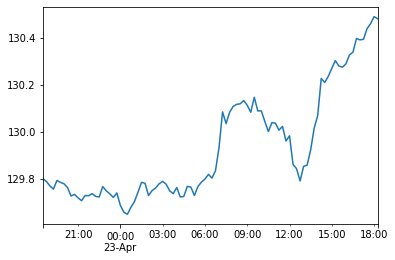

In [43]:
EURJPY_df["close"].plot()